The dataset is in: https://www.kaggle.com/datasets/thedevastator/online-retail-sales-and-customer-data


# Online Retail Sales and Customer Data

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd

In [3]:
# Read the csv and create a dataframe
sales_df = pd.read_csv('online_retail.csv')

# Exploratory Data Analysis

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


I only have two columns that have null values, one of them is object, while the other is float

In [5]:
sales_df.head(10)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [6]:
sales_df.tail(10)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [7]:
sales_df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


We can notice that the minimum value in the Quantity column is -80995.000000 it's strange because the quantity of the item sold can't be negative

In [8]:
sales_df.shape

(541909, 9)

# Cleaning up the dataset

## Removing the row with NaN value

In [9]:
sales_df_without_row_NaN = sales_df.copy()
sales_df_without_row_NaN.dropna(inplace = True)
sales_df_without_row_NaN.reset_index(drop = True, inplace = True)

In [10]:
sales_df_without_row_NaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        406829 non-null  int64  
 1   InvoiceNo    406829 non-null  object 
 2   StockCode    406829 non-null  object 
 3   Description  406829 non-null  object 
 4   Quantity     406829 non-null  int64  
 5   InvoiceDate  406829 non-null  object 
 6   UnitPrice    406829 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      406829 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 27.9+ MB


Fix the column so I can work better for the plot

In [250]:
sales_df_without_row_NaN['Sales'] = sales_df_without_row_NaN.Quantity * sales_df_without_row_NaN.UnitPrice
sales_df_without_row_NaN

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
406824,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
406825,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
406826,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
406827,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [251]:
sales_df_without_row_NaN["InvoiceDate"] = pd.to_datetime(sales_df_without_row_NaN["InvoiceDate"])
sales_df_without_row_NaN["Day"] = sales_df_without_row_NaN["InvoiceDate"].dt.day
sales_df_without_row_NaN["Month"] = sales_df_without_row_NaN["InvoiceDate"].dt.month
sales_df_without_row_NaN["Year"] = sales_df_without_row_NaN["InvoiceDate"].dt.year
sales_df_without_row_NaN

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Day,Month,Year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,9,12,2011
406825,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,9,12,2011
406826,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9,12,2011
406827,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9,12,2011


In [247]:
sales_df_without_row_NaN[sales_df_without_row_NaN['Quantity']<0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
406377,540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
406461,541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
406635,541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
406636,541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


## Maintaining the row with NaN value

In [11]:
sales_df_with_row_NaN = sales_df.copy()

- Description

In [12]:
sales_df_with_row_NaN.Description.fillna('NO DESCRIPTION', inplace = True)

- CustomerID

In [13]:
unique_CustomerID_mask = sales_df_with_row_NaN.CustomerID.unique()

In [14]:
customerId_mask = sales_df_with_row_NaN['CustomerID'].isna()
InvoiceNo_without_CustomerID = sales_df_with_row_NaN['InvoiceNo'][customerId_mask]

In [15]:
def generate_random_numbers(length, existing_numbers):
    generated_numbers = []

    # Generate random numbers until the length of the array reaches the desired length
    while len(generated_numbers) < length:
        random_number = np.random.randint(10000, 20000)

        # Ensure that the randomly generated number is not already present in the existing_numbers array
        if random_number not in existing_numbers:
            generated_numbers.append(random_number)

    return generated_numbers

In [16]:
new_CustomerID = generate_random_numbers(InvoiceNo_without_CustomerID.nunique(), unique_CustomerID_mask)

In [17]:
unique_InvoiceNo_with_NaN = InvoiceNo_without_CustomerID.unique()
for invoice in unique_InvoiceNo_with_NaN:
    # Randomly select one of the numbers from the array
    new_customerID = np.random.choice(new_CustomerID)

    # Assign the new CustomerID to the rows with the same InvoiceNo
    sales_df_with_row_NaN.loc[(sales_df_with_row_NaN['InvoiceNo'] == invoice) & customerId_mask, 'CustomerID'] = new_customerID

# Now sales_df_with_row_NaN contains the DataFrame with the new assigned CustomerIDs

In [18]:
sales_df_with_row_NaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  541909 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   541909 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [19]:
sales_df_with_row_NaN.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,541909.000000
mean,270954.000000,9.552250,4.611114,15205.292819
std,156435.797851,218.081158,96.759853,2316.177864
min,0.000000,-80995.000000,-11062.060000,10001.000000
25%,135477.000000,1.000000,1.250000,13455.000000
50%,270954.000000,3.000000,2.080000,15093.000000
75%,406431.000000,10.000000,4.130000,17071.000000
max,541908.000000,80995.000000,38970.000000,19999.000000


Fix the column so I can work better for the plot

In [21]:
sales_df_with_row_NaN['Sales'] = sales_df_with_row_NaN.Quantity * sales_df_with_row_NaN.UnitPrice
sales_df_with_row_NaN

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [51]:
sales_df_with_row_NaN["InvoiceDate"] = pd.to_datetime(sales_df_with_row_NaN["InvoiceDate"])
sales_df_with_row_NaN["Day"] = sales_df_with_row_NaN["InvoiceDate"].dt.day
sales_df_with_row_NaN["Month"] = sales_df_with_row_NaN["InvoiceDate"].dt.month
sales_df_with_row_NaN["Year"] = sales_df_with_row_NaN["InvoiceDate"].dt.year
sales_df_with_row_NaN

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Day,Month,Year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,9,12,2011
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,9,12,2011
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9,12,2011
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9,12,2011


In [252]:
sales_df_with_row_NaN[sales_df_with_row_NaN['Quantity']<0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Day,Month,Year
141,141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,1,12,2010
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,1,12,2010
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,1,12,2010
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1,12,2010
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,9,12,2011
541541,541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,9,12,2011
541715,541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,9,12,2011
541716,541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,9,12,2011


# Plot

In this Colab I decide to use the sales_df_with_row_NaN dataset

In [175]:
colors = ['#FFB6C1', '#FFDAB9', '#ADD8E6', '#98FB98', '#FFA07A', '#87CEFA', '#FF69B4', '#F0E68C', '#D3D3D3', '#B0C4DE']
# vector colors that I use in the plot

## All sales and their location

In [154]:
sales_in_the_world = sales_df_with_row_NaN.groupby("Country")["Sales"].sum().sort_values()
sales_in_the_world

Country
Saudi Arabia                131.170
Bahrain                     548.400
Czech Republic              707.720
RSA                        1002.310
Brazil                     1143.600
European Community         1291.750
Lithuania                  1661.060
Lebanon                    1693.880
USA                        1730.920
United Arab Emirates       1902.280
Malta                      2505.470
Canada                     3666.380
Iceland                    4310.000
Greece                     4710.520
Unspecified                4749.790
Poland                     7213.140
Israel                     7907.820
Singapore                  9120.390
Hong Kong                 10117.040
Austria                   10154.320
Cyprus                    12946.290
Italy                     16890.510
Denmark                   18768.140
Channel Islands           20086.290
Finland                   22326.740
Portugal                  29367.020
Norway                    35163.460
Japan               

<ipython-input-155-ea1aee1f3285>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


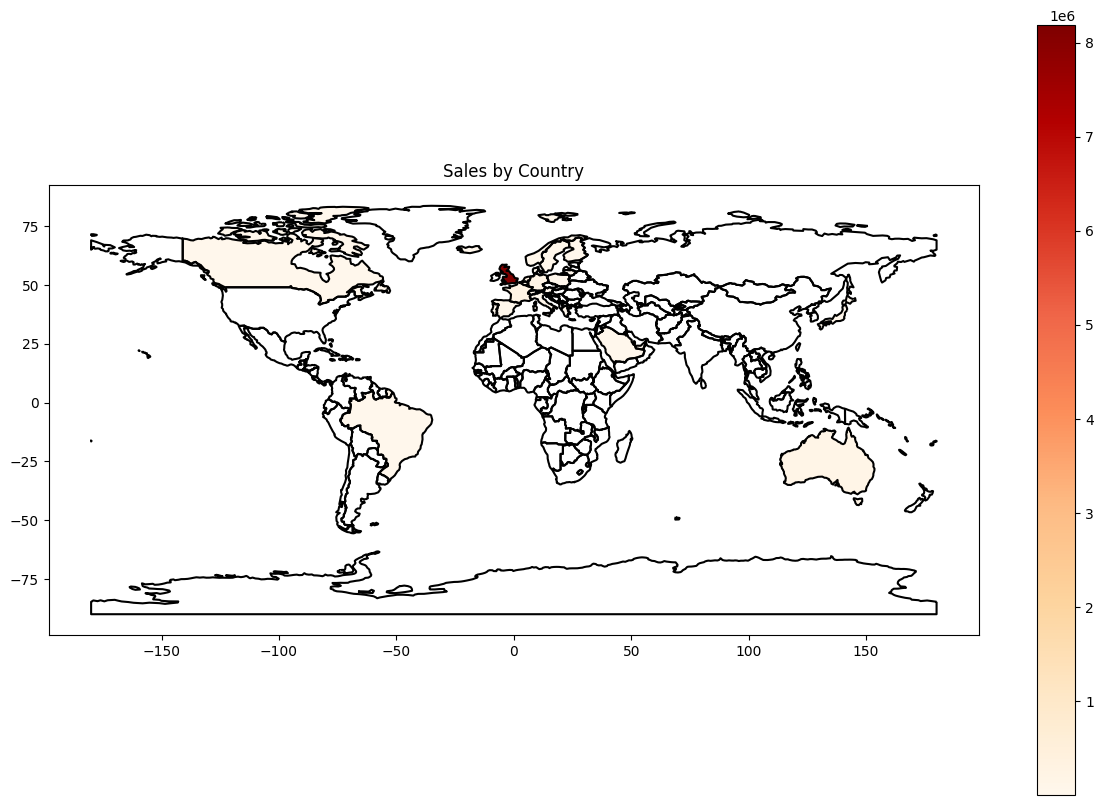

In [155]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(sales_in_the_world, how='left', left_on='name', right_on = 'Country')

# Contour plot of the world in black
world.boundary.plot(color = 'black', figsize=(15, 10))

# World map plot with sales data highlighted
world.plot(column='Sales', cmap='OrRd', legend=True, ax=plt.gca())

plt.title('Sales by Country')
plt.show()


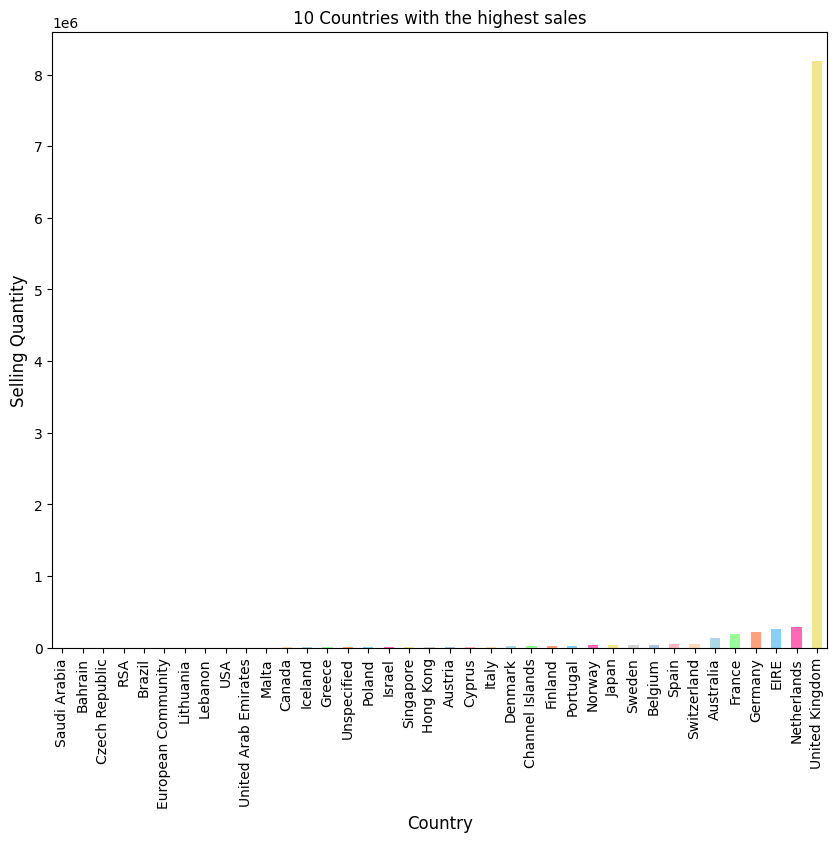

In [206]:
plt.figure(figsize=(10,8))
sales_in_the_world.plot(kind = "bar", color = colors)
plt.title("10 Countries with the highest sales")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Selling Quantity", fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

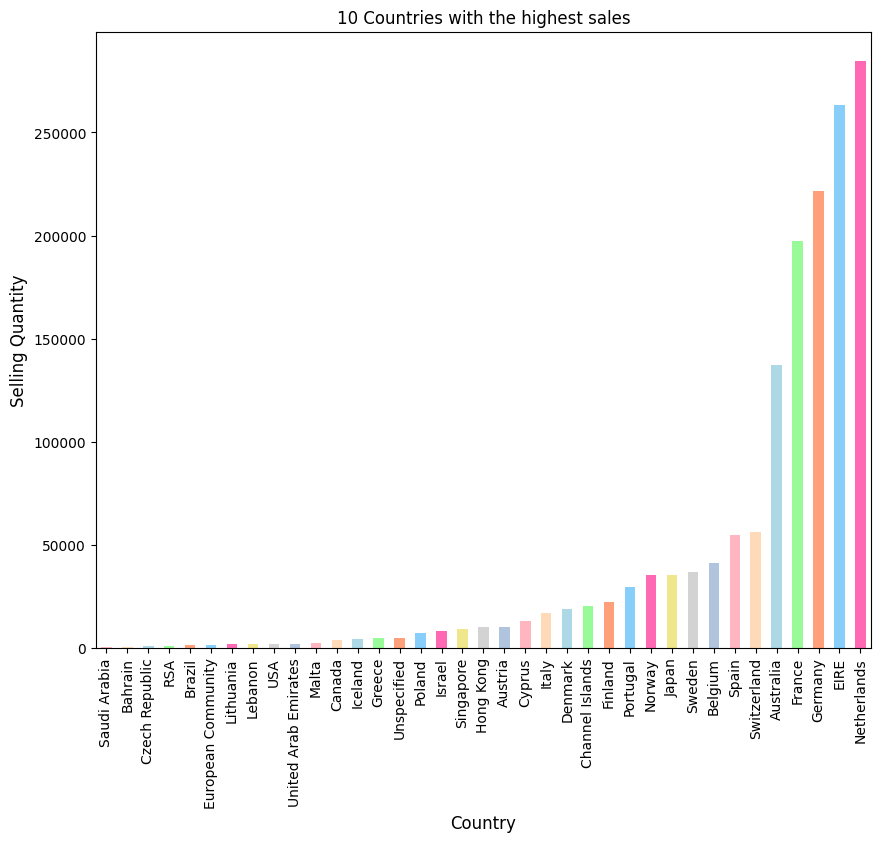

In [211]:
sales_in_the_world = sales_df_with_row_NaN.groupby("Country")["Sales"].sum().sort_values()
sales_in_the_world = sales_in_the_world.iloc[:len(sales_in_the_world)-1]
plt.figure(figsize=(10,8))
sales_in_the_world.plot(kind = "bar", color = colors)
plt.title("10 Countries with the highest sales")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Selling Quantity", fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

## 10 Countries with the highest sales

In [222]:
highest_country_sales = sales_df_with_row_NaN.groupby("Country")["Sales"].sum().nlargest(10)
highest_country_sales

Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Australia          137077.270
Switzerland         56385.350
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: Sales, dtype: float64

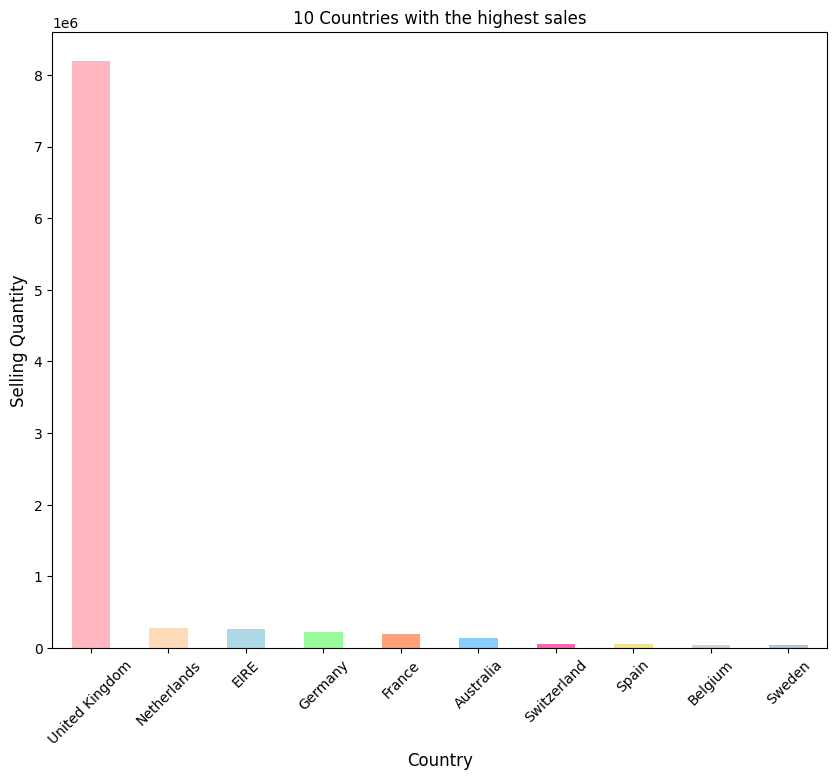

In [223]:
plt.figure(figsize=(10,8))
highest_country_sales.plot(kind = "bar", color = colors)
plt.title("10 Countries with the highest sales")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Selling Quantity", fontsize = 12)
plt.xticks(rotation=45)
plt.show()

Same graph but in logarithmic scale

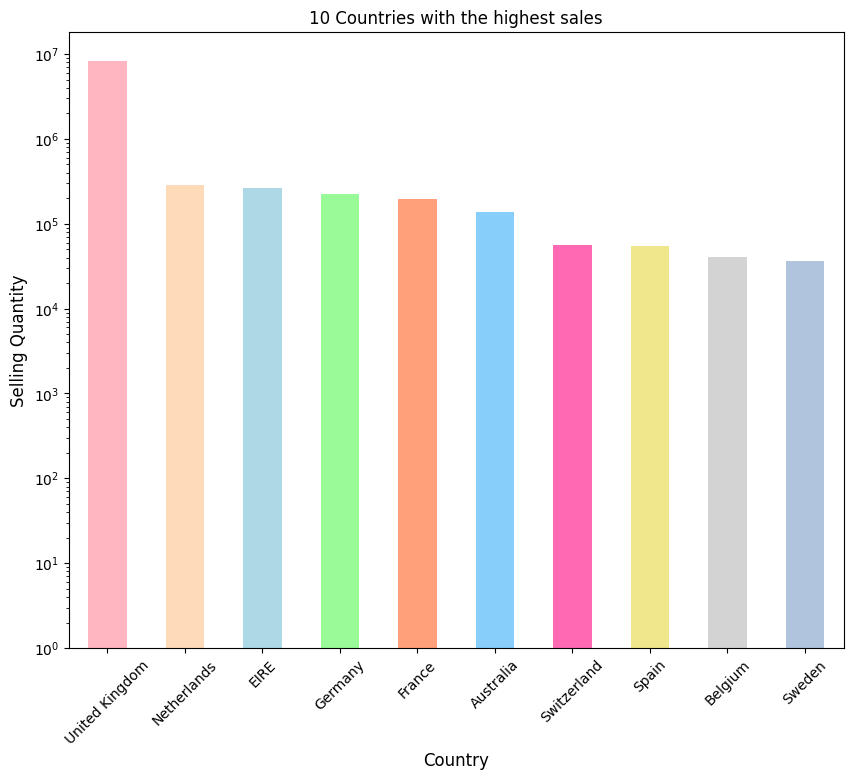

In [224]:
plt.figure(figsize=(10,8))
highest_country_sales.plot(kind = "bar", log = True, color = colors)
plt.title("10 Countries with the highest sales")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Selling Quantity", fontsize = 12)
plt.xticks(rotation=45)
plt.show()

## 10 countries with the highest sales excluding the United Kingdom

In [221]:
highest_country_sales_excluding_UK = sales_df_with_row_NaN.groupby("Country")["Sales"].sum().nlargest(11)
highest_country_sales_excluding_UK = highest_country_sales_excluding_UK.iloc[1:]
highest_country_sales_excluding_UK

Country
Netherlands    284661.54
EIRE           263276.82
Germany        221698.21
France         197403.90
Australia      137077.27
Switzerland     56385.35
Spain           54774.58
Belgium         40910.96
Sweden          36595.91
Japan           35340.62
Name: Sales, dtype: float64

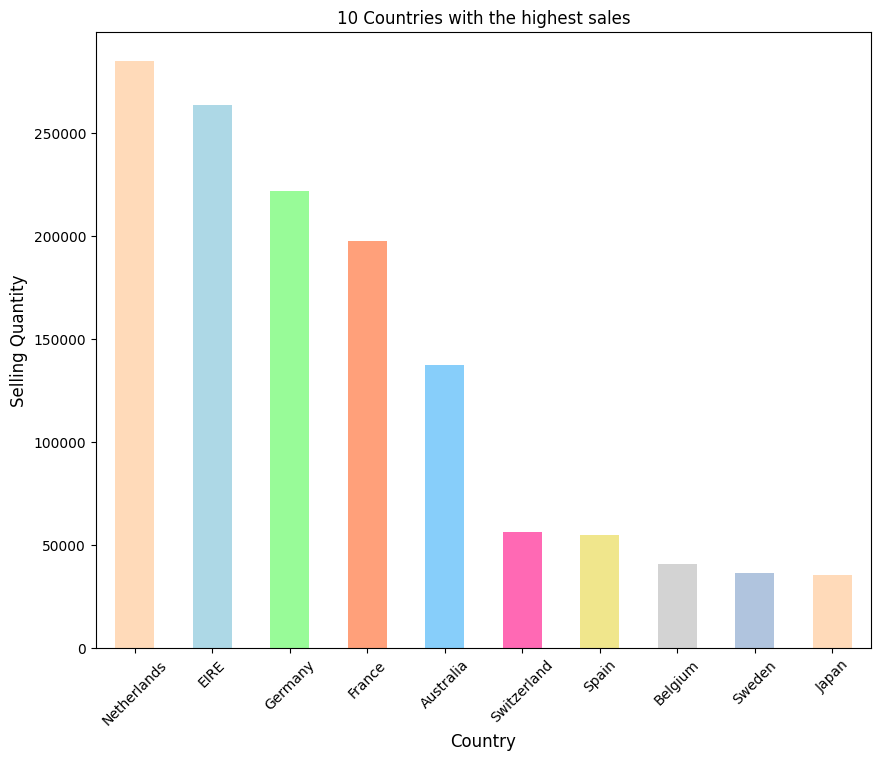

In [225]:
same_colors = colors[1:]
plt.figure(figsize=(10,8))
highest_country_sales_excluding_UK.plot(kind = "bar", color = same_colors)
plt.title("10 Countries with the highest sales")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Selling Quantity", fontsize = 12)
plt.xticks(rotation=45)
plt.show()

## 10 Countries with the smallest sales

In [227]:
smallest_country_sales = sales_df_with_row_NaN.groupby("Country")["Sales"].sum().nsmallest(10)
smallest_country_sales

Country
Saudi Arabia             131.17
Bahrain                  548.40
Czech Republic           707.72
RSA                     1002.31
Brazil                  1143.60
European Community      1291.75
Lithuania               1661.06
Lebanon                 1693.88
USA                     1730.92
United Arab Emirates    1902.28
Name: Sales, dtype: float64

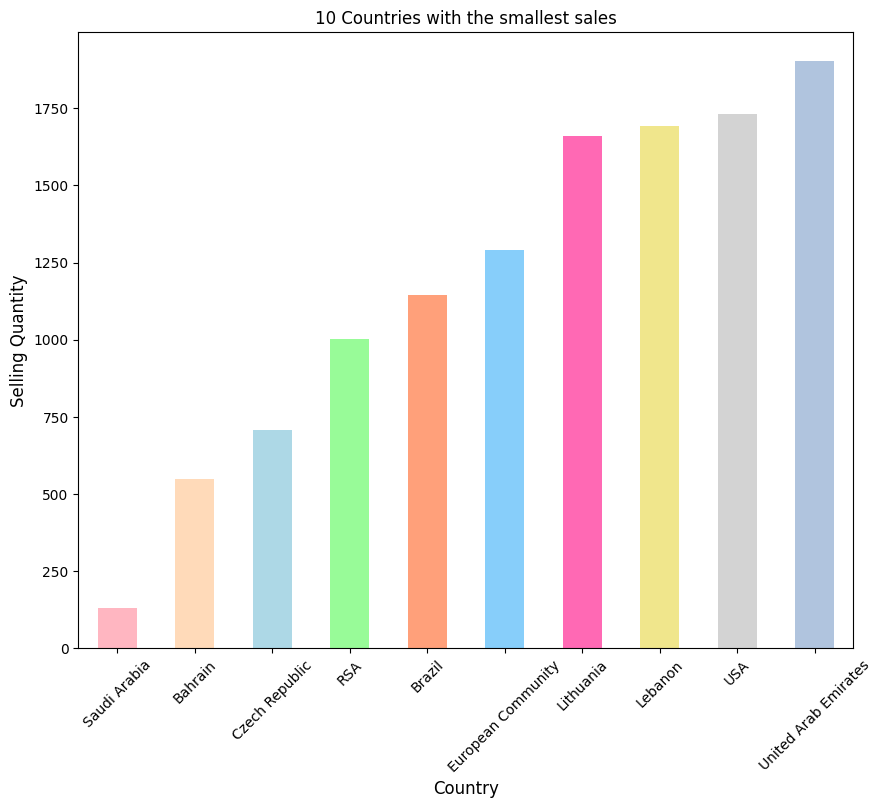

In [164]:
plt.figure(figsize=(10,8))
smallest_country_sales.plot(kind = "bar", color = colors)
plt.title("10 Countries with the smallest sales")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Selling Quantity", fontsize = 12)
plt.xticks(rotation=45)
plt.show()

## Top 10 CustomerID with the most sales

In [232]:
customerId_sales = sales_df_with_row_NaN.groupby("CustomerID")["Sales"].sum().nlargest(10)
customerId_sales

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: Sales, dtype: float64

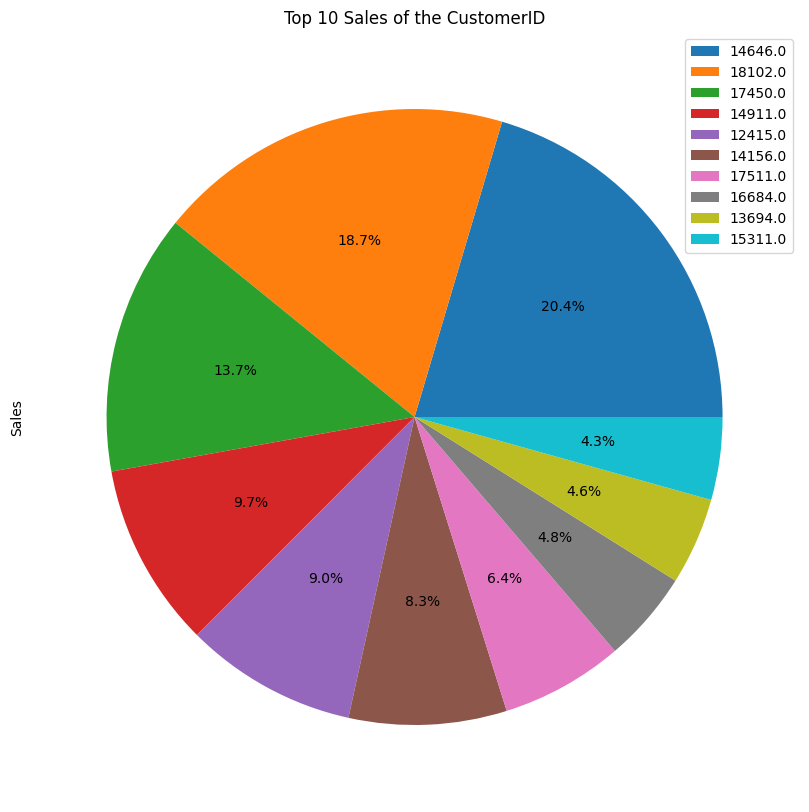

In [241]:
plt.figure(figsize=(15,10))
customerId_sales.plot(kind = "pie", labels = None, autopct='%.1f%%')
plt.title("Top 10 Sales of the CustomerID")
plt.legend(labels=customerId_sales.index)
plt.show()